# Chapter 9 - Unsupervised Learning Techniques Code Reproduction:

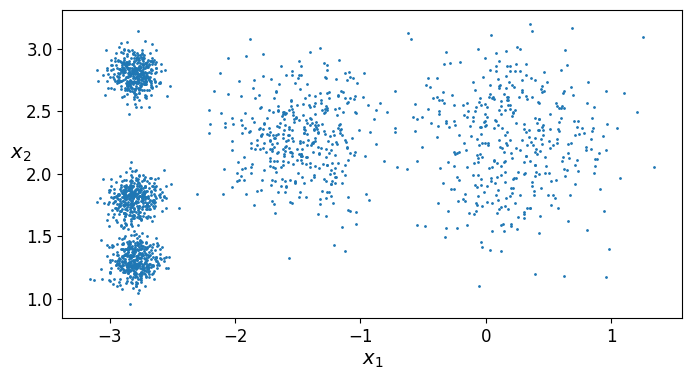

In [1]:
# Impor umum
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# Konfigurasi plot
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Membuat dataset blob untuk clustering
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

# Fungsi untuk plot cluster
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

Label prediksi untuk 5 instance pertama: [2 2 4 2 2]
Centroid yang ditemukan:
 [[-0.066884    2.10378803]
 [-2.79290307  2.79641063]
 [-2.80214068  1.55162671]
 [-1.47468607  2.28399066]
 [ 0.47042841  2.41380533]]
Inertia model: 224.0743312251571


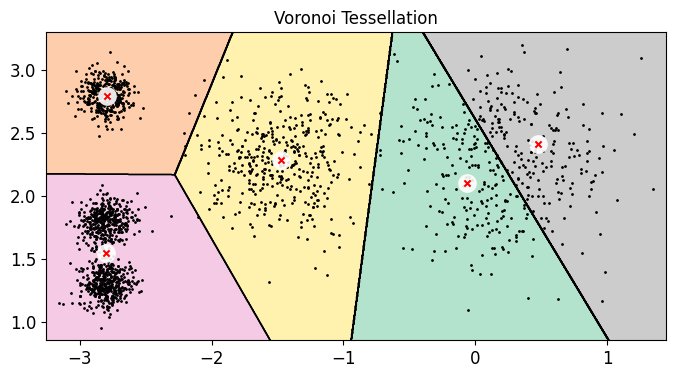

In [2]:
from sklearn.cluster import KMeans

# Melatih model K-Means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

# Menampilkan hasil prediksi dan atribut model
print("Label prediksi untuk 5 instance pertama:", y_pred[:5])
print("Centroid yang ditemukan:\n", kmeans.cluster_centers_)
print("Inertia model:", kmeans.inertia_)

# Memvisualisasikan decision boundaries (Voronoi tessellation)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    # ... (fungsi plot dari buku, disederhanakan di sini)
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    if show_centroids:
        plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1],
                    marker='o', s=30, linewidths=8,
                    color='w', zorder=10, alpha=0.9)
        plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1],
                    marker='x', s=20,
                    color='r', zorder=11, alpha=1)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.title("Voronoi Tessellation")
plt.show()

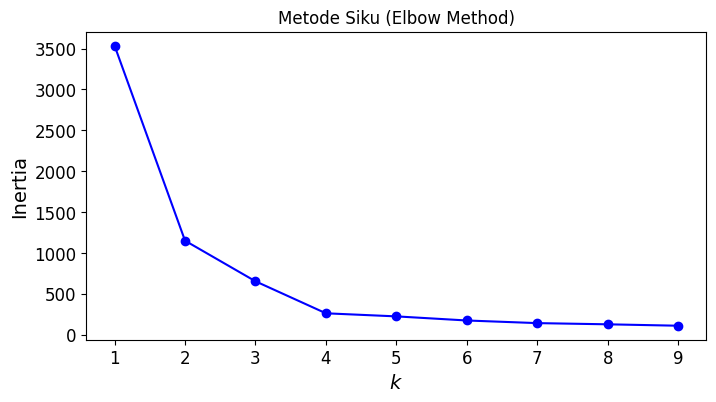


Silhouette score untuk k=4: 0.688531617595759


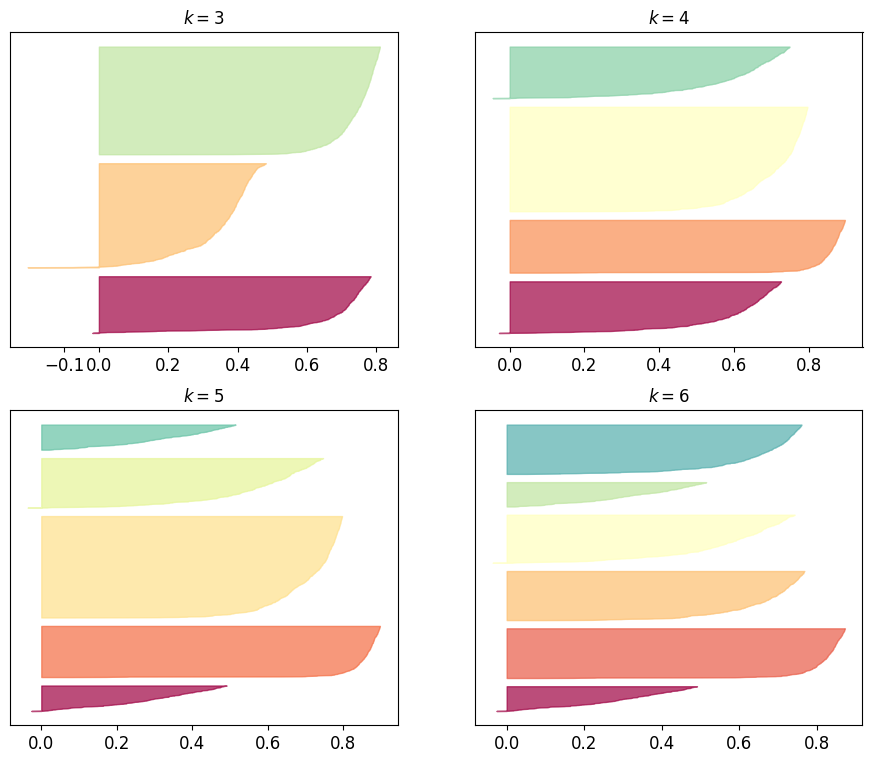

In [3]:
# Metode Siku (Elbow Method) menggunakan inertia
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.title("Metode Siku (Elbow Method)")
plt.show()
# HASIL: "Siku" terlihat jelas di k=4, menunjukkan bahwa 4 adalah pilihan k yang baik.

# Metode Silhouette Score
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

print("\nSilhouette score untuk k=4:", silhouette_score(X, kmeans_per_k[3].labels_))

# Plot Silhouette Diagram
plt.figure(figsize=(11, 9))
for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        pos += len(coeffs) + padding

    plt.title("$k={}$".format(k))
    plt.gca().yaxis.set_major_locator(FixedLocator([]))
    plt.gca().xaxis.set_major_locator(FixedLocator([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]))

plt.show()
# HASIL: Diagram untuk k=4 terlihat paling baik, karena semua cluster memiliki ketebalan
# yang serupa dan melewati garis putus-putus (rata-rata silhouette score).


Label DBSCAN untuk 10 instance pertama: [0 0 0 0 1 0 0 0 0 1]
Jumlah core instances: 1000


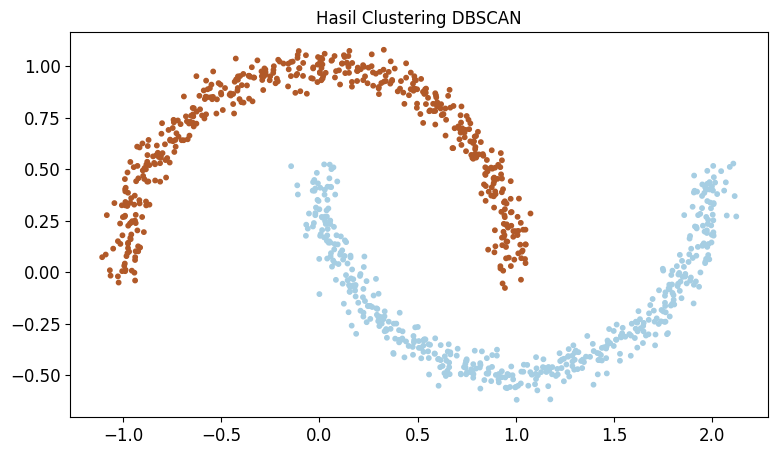

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Membuat dataset moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Melatih model DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

# Menampilkan label. Label -1 berarti outlier/noise.
print("\nLabel DBSCAN untuk 10 instance pertama:", dbscan.labels_[:10])
print("Jumlah core instances:", len(dbscan.core_sample_indices_))

# Plot hasil DBSCAN
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    # ... (fungsi plot dari buku)
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    plt.scatter(X[core_mask, 0], X[core_mask, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(X[non_core_mask, 0], X[non_core_mask, 1], c=dbscan.labels_[non_core_mask], marker='.', s=size, cmap="Paired")
    plt.scatter(X[anomalies_mask, 0], X[anomalies_mask, 1], c="r", marker="x", s=size*2)

plt.figure(figsize=(9, 5))
plot_dbscan(dbscan, X, size=10)
plt.title("Hasil Clustering DBSCAN")
plt.show()


Bobot komponen (GMM): [0.09 0.4  0.2  0.2  0.11]
Mean (pusat) komponen (GMM):
 [[ 0.06  2.56]
 [-2.8   1.55]
 [-2.8   2.8 ]
 [-1.48  2.29]
 [ 0.31  2.02]]
Kovarians komponen (GMM):
 [[[ 0.13  0.02]
  [ 0.02  0.06]]

 [[ 0.01  0.  ]
  [ 0.    0.07]]

 [[ 0.01 -0.  ]
  [-0.    0.01]]

 [[ 0.09  0.  ]
  [ 0.    0.09]]

 [[ 0.13  0.04]
  [ 0.04  0.1 ]]]
Prediksi hard clustering (GMM): [1 1 4 1 1]
Prediksi soft clustering (GMM):
 [[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


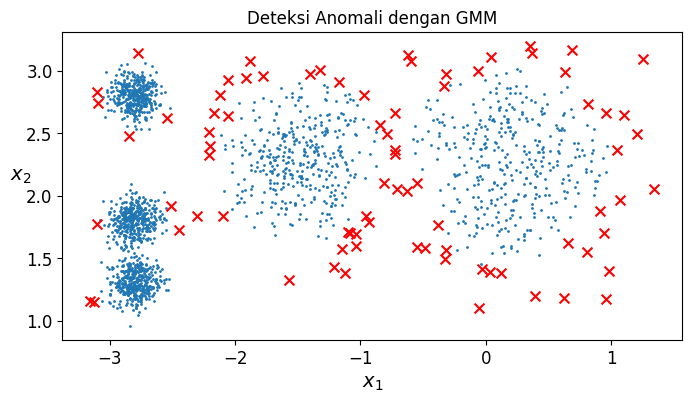

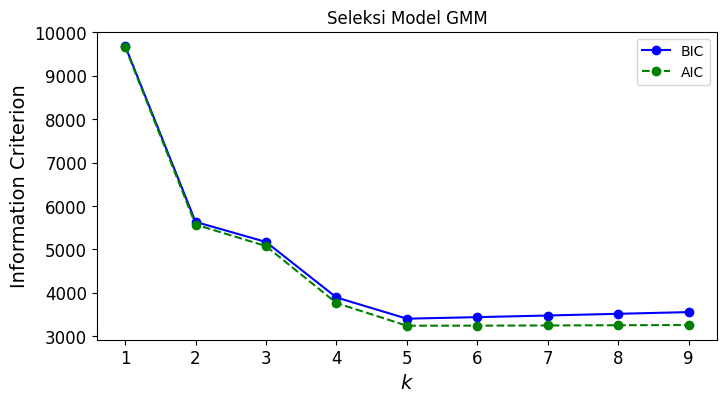

In [5]:
from sklearn.mixture import GaussianMixture

# Menggunakan data blob dari awal
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

# Melatih model Gaussian Mixture
gm = GaussianMixture(n_components=5, n_init=10, random_state=42)
gm.fit(X)

# Menampilkan parameter yang ditemukan
print("\nBobot komponen (GMM):", gm.weights_.round(2))
print("Mean (pusat) komponen (GMM):\n", gm.means_.round(2))
print("Kovarians komponen (GMM):\n", gm.covariances_.round(2))

# GMM dapat melakukan hard clustering (predict) dan soft clustering (predict_proba)
print("Prediksi hard clustering (GMM):", gm.predict(X)[:5])
print("Prediksi soft clustering (GMM):\n", gm.predict_proba(X).round(3)[:5])

# Deteksi Anomali dengan GMM
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4) # Ambil 4% data dengan densitas terendah
anomalies = X[densities < density_threshold]

# Plot anomali
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='x', s=50)
plt.title("Deteksi Anomali dengan GMM")
plt.show()


# Seleksi Model dengan BIC dan AIC
bics = [GaussianMixture(n_components=k, n_init=10).fit(X).bic(X)
        for k in range(1, 10)]
aics = [GaussianMixture(n_components=k, n_init=10).fit(X).aic(X)
        for k in range(1, 10)]

# Plot BIC dan AIC
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), bics, "bo-", label="BIC")
plt.plot(range(1, 10), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.legend()
plt.title("Seleksi Model GMM")
plt.show()
# HASIL: Nilai BIC dan AIC terendah berada di k=5,
# yang berarti model berhasil menemukan jumlah cluster yang benar.